In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset after covnverting it to a .csv format manually
df = pd.read_csv('loan.csv')

In [3]:
#Viewing the top 5 rows of the dataset
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
#Viewing the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [5]:
#Changing variables as categorical
df["Sex"]=df["Sex"].astype("category")
df["Res_status"]=df["Res_status"].astype("category")
df["Telephone"]=df["Telephone"].astype("category")
df["Occupation"]=df["Occupation"].astype("category")
df["Acc_ref"]=df["Acc_ref"].astype("category")
df["Liab_ref"]=df["Liab_ref"].astype("category")
df["Decision"]=df["Decision"].astype("category")

In [6]:
#Viewing information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sex              429 non-null    category
 1   Age              429 non-null    float64 
 2   Time_at_address  429 non-null    float64 
 3   Res_status       429 non-null    category
 4   Telephone        429 non-null    category
 5   Occupation       429 non-null    category
 6   Job_status       429 non-null    object  
 7   Time_employed    429 non-null    int64   
 8   Time_bank        429 non-null    int64   
 9   Liab_ref         429 non-null    category
 10  Acc_ref          429 non-null    category
 11  Home_Expn        429 non-null    int64   
 12  Balance          429 non-null    int64   
 13  Decision         429 non-null    category
dtypes: category(7), float64(2), int64(4), object(1)
memory usage: 27.5+ KB


In [7]:
#Separating features X from target variable y
y = df.Decision
X = df.drop(['Decision'],axis = 1)

In [8]:
#introducing dummy variables.
X=pd.get_dummies(X,prefix="Cat")

X.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Cat_F,Cat_M,Cat_owner,Cat_rent,...,Cat_military,Cat_private_s,Cat_retired,Cat_self_empl,Cat_student,Cat_unemploye,Cat_f,Cat_t,Cat_given,Cat_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
#Scaling the data
scaler=MinMaxScaler();
scaler=scaler.fit(X)

scaledData=scaler.transform(X)

In [10]:
#Converting scaled data to a dataframe
data=pd.DataFrame(scaledData,columns=X.columns)

In [11]:
data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Cat_F,Cat_M,Cat_owner,Cat_rent,...,Cat_military,Cat_private_s,Cat_retired,Cat_self_empl,Cat_student,Cat_unemploye,Cat_f,Cat_t,Cat_given,Cat_oth_inst_
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [12]:
#Changing target variable to float
y.replace(('accept', 'reject'), (1, 0), inplace=True)
y

0      0
1      0
2      1
3      1
4      0
      ..
424    0
425    0
426    1
427    1
428    0
Name: Decision, Length: 429, dtype: int64

In [13]:
#Splitting test and train data 80-20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
X_train

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Cat_F,Cat_M,Cat_owner,Cat_rent,...,Cat_military,Cat_private_s,Cat_retired,Cat_self_empl,Cat_student,Cat_unemploye,Cat_f,Cat_t,Cat_given,Cat_oth_inst_
218,28.080000,15.000000,0,0,0,13212,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
84,31.420000,15.500000,0,0,120,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
193,20.750000,9.540000,0,0,200,1000,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
152,42.000000,9.790000,7,8,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
237,76.750000,22.290001,12,1,0,109,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,22.750000,11.000000,2,7,100,809,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
232,25.000000,11.250000,2,17,200,1208,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
41,49.000000,1.500000,0,0,100,27,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
180,41.169998,6.500000,0,3,145,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0


The parameters combination that would give best accuracy for linear kernel is : 
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


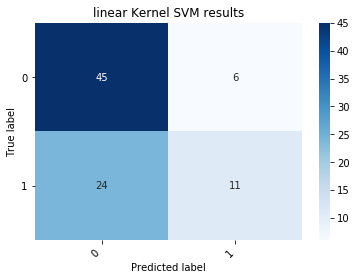

In [ ]:
#Choosing the kernels to iterate on
kernellist = ['linear', 'poly', 'rbf']
#Kernels chosen are linear, polynomial and rbf kernels

predictions = []

# fitting the model for grid search

for i in kernellist:
    
    #Hyperparameter tuning using gridsearchCV
    
    param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1],
              'kernel': [i]}
    
    #Initializing a SVM 
    grid = GridSearchCV(SVC(), param_grid, refit = True, cv = 3)
    
    #Fitting model using best parameters
    grid.fit(X_train, y_train)
    
    #Predicting values using said parameters
    y_pred = grid.predict(X_test)
    
    #Saving accuracy score of the model in a list
    predictions.append(accuracy_score(y_test, y_pred))
    
    print('The parameters combination that would give best accuracy for '+i+' kernel is : ')
    print(grid.best_params_)

    #We create a confusion matrix to plot the true positive, false positives,
    #false negatives, and true negatives
    confusion = confusion_matrix(y_test, y_pred)
    
    classnames = list(set(y_train))
    
    #creating a data frame containing confusion matrix data
    dataplot = pd.DataFrame(np.mat(confusion), index=classnames, columns=classnames)
    
    #Plotting a graph on the confusion matrix data
    plt.figure()
    heatmap = sns.heatmap(dataplot, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(i + ' Kernel SVM results')
    plt.show()    

    

In [ ]:
#Comparing accuracy scores
for i in range(len(kernellist)):
    print("Accuracy of {} kernel is {}%".format(kernellist[i], str(predictions[i]*100)[:5]))
    
    

As we can see, the linear kernel performs the best with an accruacy of _____________. This means that the loan dataset is linearly separable. 